# Orbit Classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d brsdincer/orbitclassification

Dataset URL: https://www.kaggle.com/datasets/brsdincer/orbitclassification
License(s): DbCL-1.0
100%|███████████████████████████████████████| 80.9k/80.9k [00:00<00:00, 160kB/s]
100%|███████████████████████████████████████| 80.9k/80.9k [00:00<00:00, 160kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Orbit Classification/orbitclassification.zip', 'r')
zip_ref.extractall('//home/bhxveshhh/ML/Orbit Classification')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('classast - pha.csv')

In [6]:
df.head()

,a (AU),e,i (deg),w (deg),Node (deg),M (deg),q (AU),Q (AU),P (yr),H (mag),MOID (AU),class
0,1.078066,0.826854,22.825495,31.382966,88.010681,215.528772,0.1867,1.97,1.12,16.90,0.034507,APO*
1,1.245304,0.335342,13.337482,276.893024,337.207958,104.155607,0.8277,1.66,1.39,15.60,0.030669,APO*
2,1.470264,0.559922,6.352995,285.852564,35.736768,174.626213,0.6470,2.29,1.78,16.25,0.025795,APO*
3,1.776025,0.650141,39.832538,267.791993,356.903343,173.188556,0.6214,2.93,2.37,15.20,0.003551,APO*
4,1.874123,0.764602,1.326399,43.388048,349.694944,235.158622,0.4412,3.31,2.57,18.80,0.011645,APO*


In [7]:
df.shape

(1748, 12)

In [8]:
df.size

20976

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   a (AU)      1748 non-null   float64
 1   e           1748 non-null   float64
 2   i (deg)     1748 non-null   float64
 3   w (deg)     1748 non-null   float64
 4   Node (deg)  1748 non-null   float64
 5   M (deg)     1748 non-null   float64
 6   q (AU)      1748 non-null   float64
 7   Q (AU)      1748 non-null   float64
 8   P (yr)      1748 non-null   float64
 9   H (mag)     1748 non-null   float64
 10  MOID (AU)   1748 non-null   float64
 11  class       1748 non-null   object 
dtypes: float64(11), object(1)
memory usage: 164.0+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
a (AU),1748.0,1.745759,0.690729,0.635223,1.265084,1.698290,2.179176,17.818679
e,1748.0,0.527417,0.179629,0.025425,0.408588,0.549531,0.653530,0.956042
i (deg),1748.0,13.312400,11.614397,0.146084,4.875430,9.315508,18.796947,75.412403
w (deg),1748.0,180.497546,99.661178,0.521838,95.635077,185.986518,266.913890,359.662669
Node (deg),1748.0,172.251967,102.737794,0.136042,82.401816,168.528048,256.374858,359.854602
M (deg),1748.0,180.809702,107.280935,0.052165,83.230489,182.880959,275.895719,359.825201
q (AU),1748.0,0.756564,0.221101,0.092800,0.617025,0.815600,0.936075,1.060100
Q (AU),1748.0,2.735000,1.344958,0.960000,1.767500,2.605000,3.580000,34.680000
P (yr),1748.0,2.423793,2.088742,0.510000,1.420000,2.210000,3.220000,75.220000
H (mag),1748.0,19.966796,1.506929,14.100000,19.100000,20.200000,21.200000,22.400000


In [11]:
df.isnull().sum()

a (AU)        0
e             0
i (deg)       0
w (deg)       0
Node (deg)    0
M (deg)       0
q (AU)        0
Q (AU)        0
P (yr)        0
H (mag)       0
MOID (AU)     0
class         0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.nunique()

a (AU)        1748
e             1748
i (deg)       1748
w (deg)       1748
Node (deg)    1748
M (deg)       1748
q (AU)        1527
Q (AU)         413
P (yr)         437
H (mag)        109
MOID (AU)     1717
class            6
dtype: int64

In [14]:
df['class'].value_counts()

class
APO*    1477
ATE*     149
AMO*      96
APO       14
ATE        7
IEO*       5
Name: count, dtype: int64

## Data Visualization

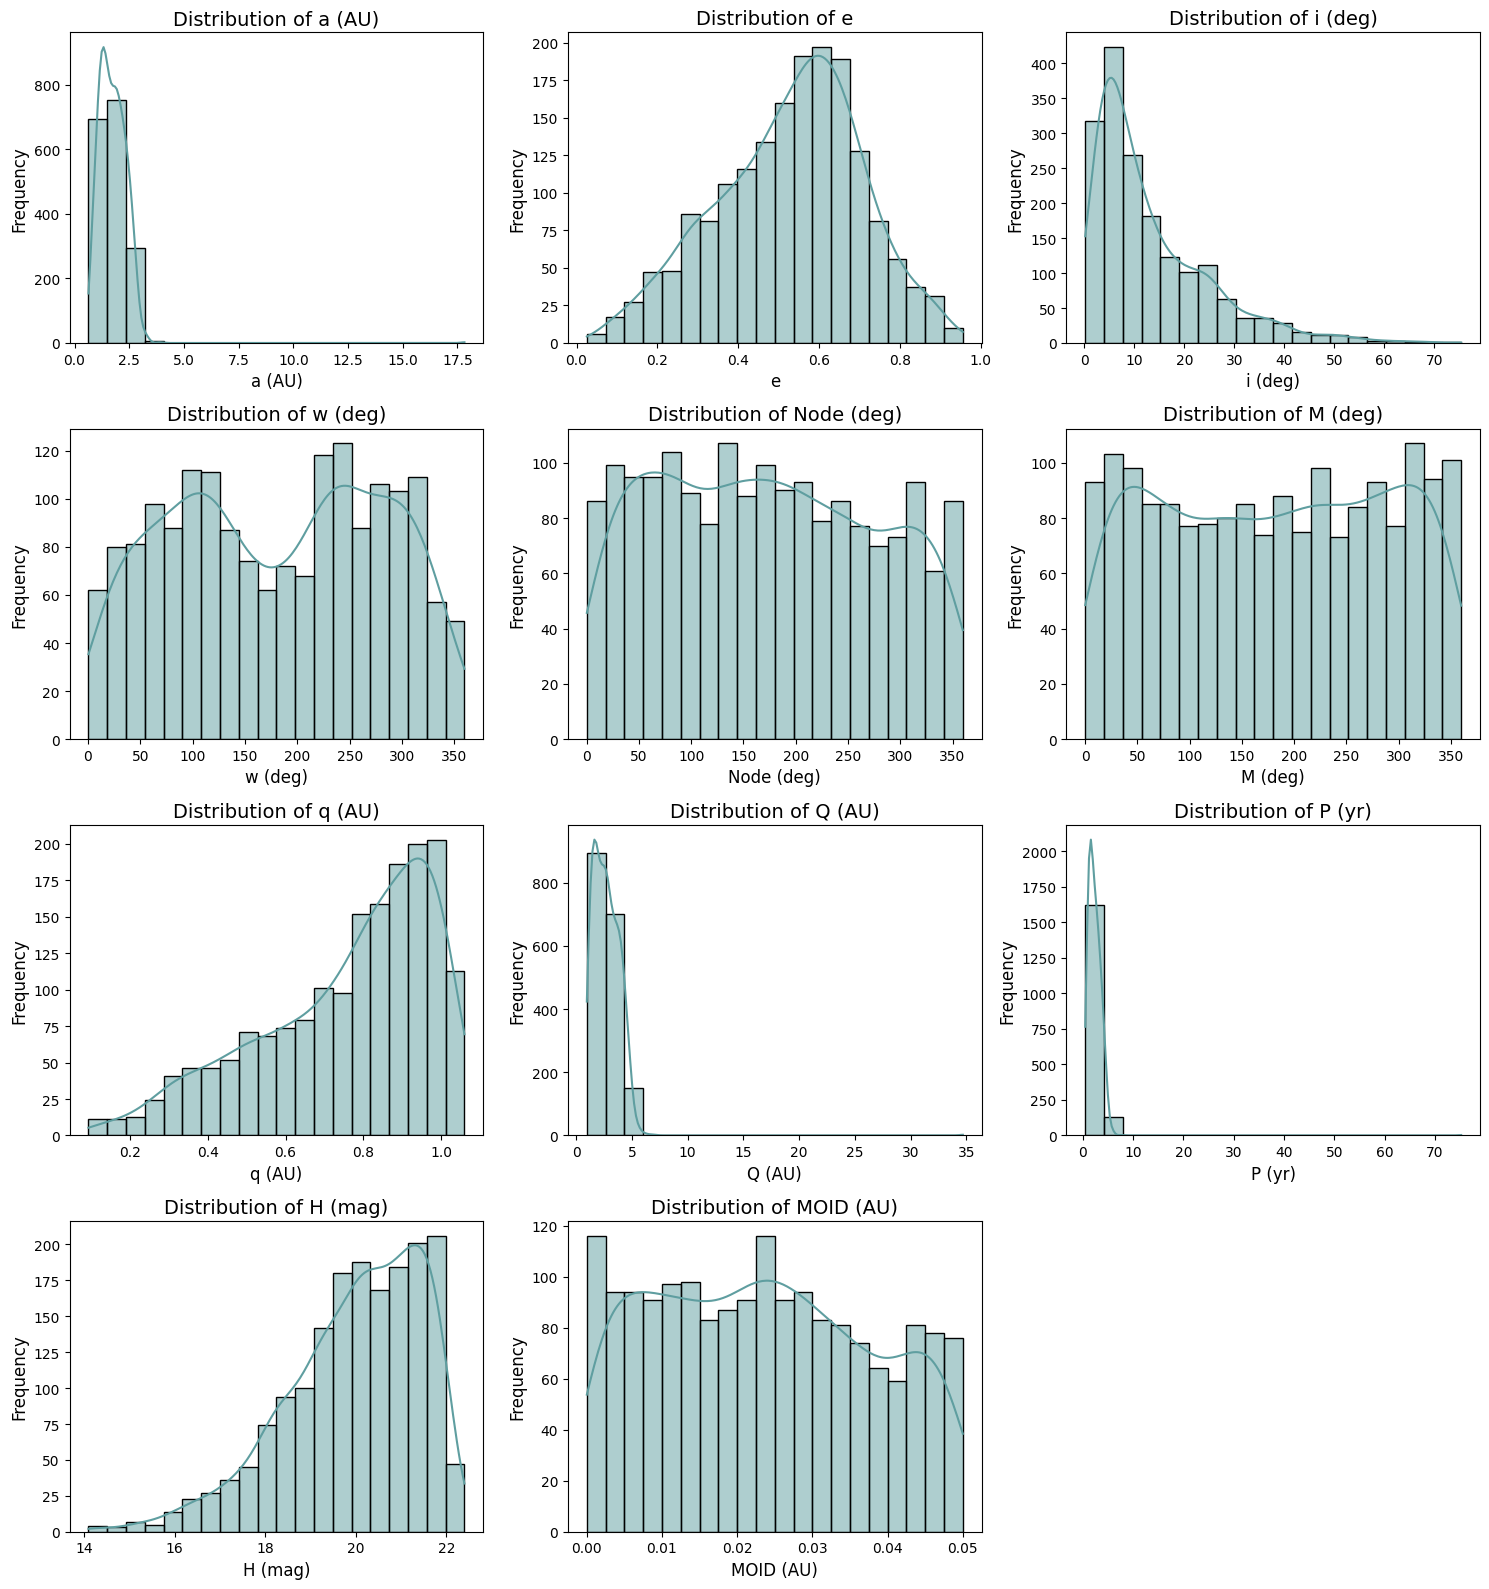

In [15]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

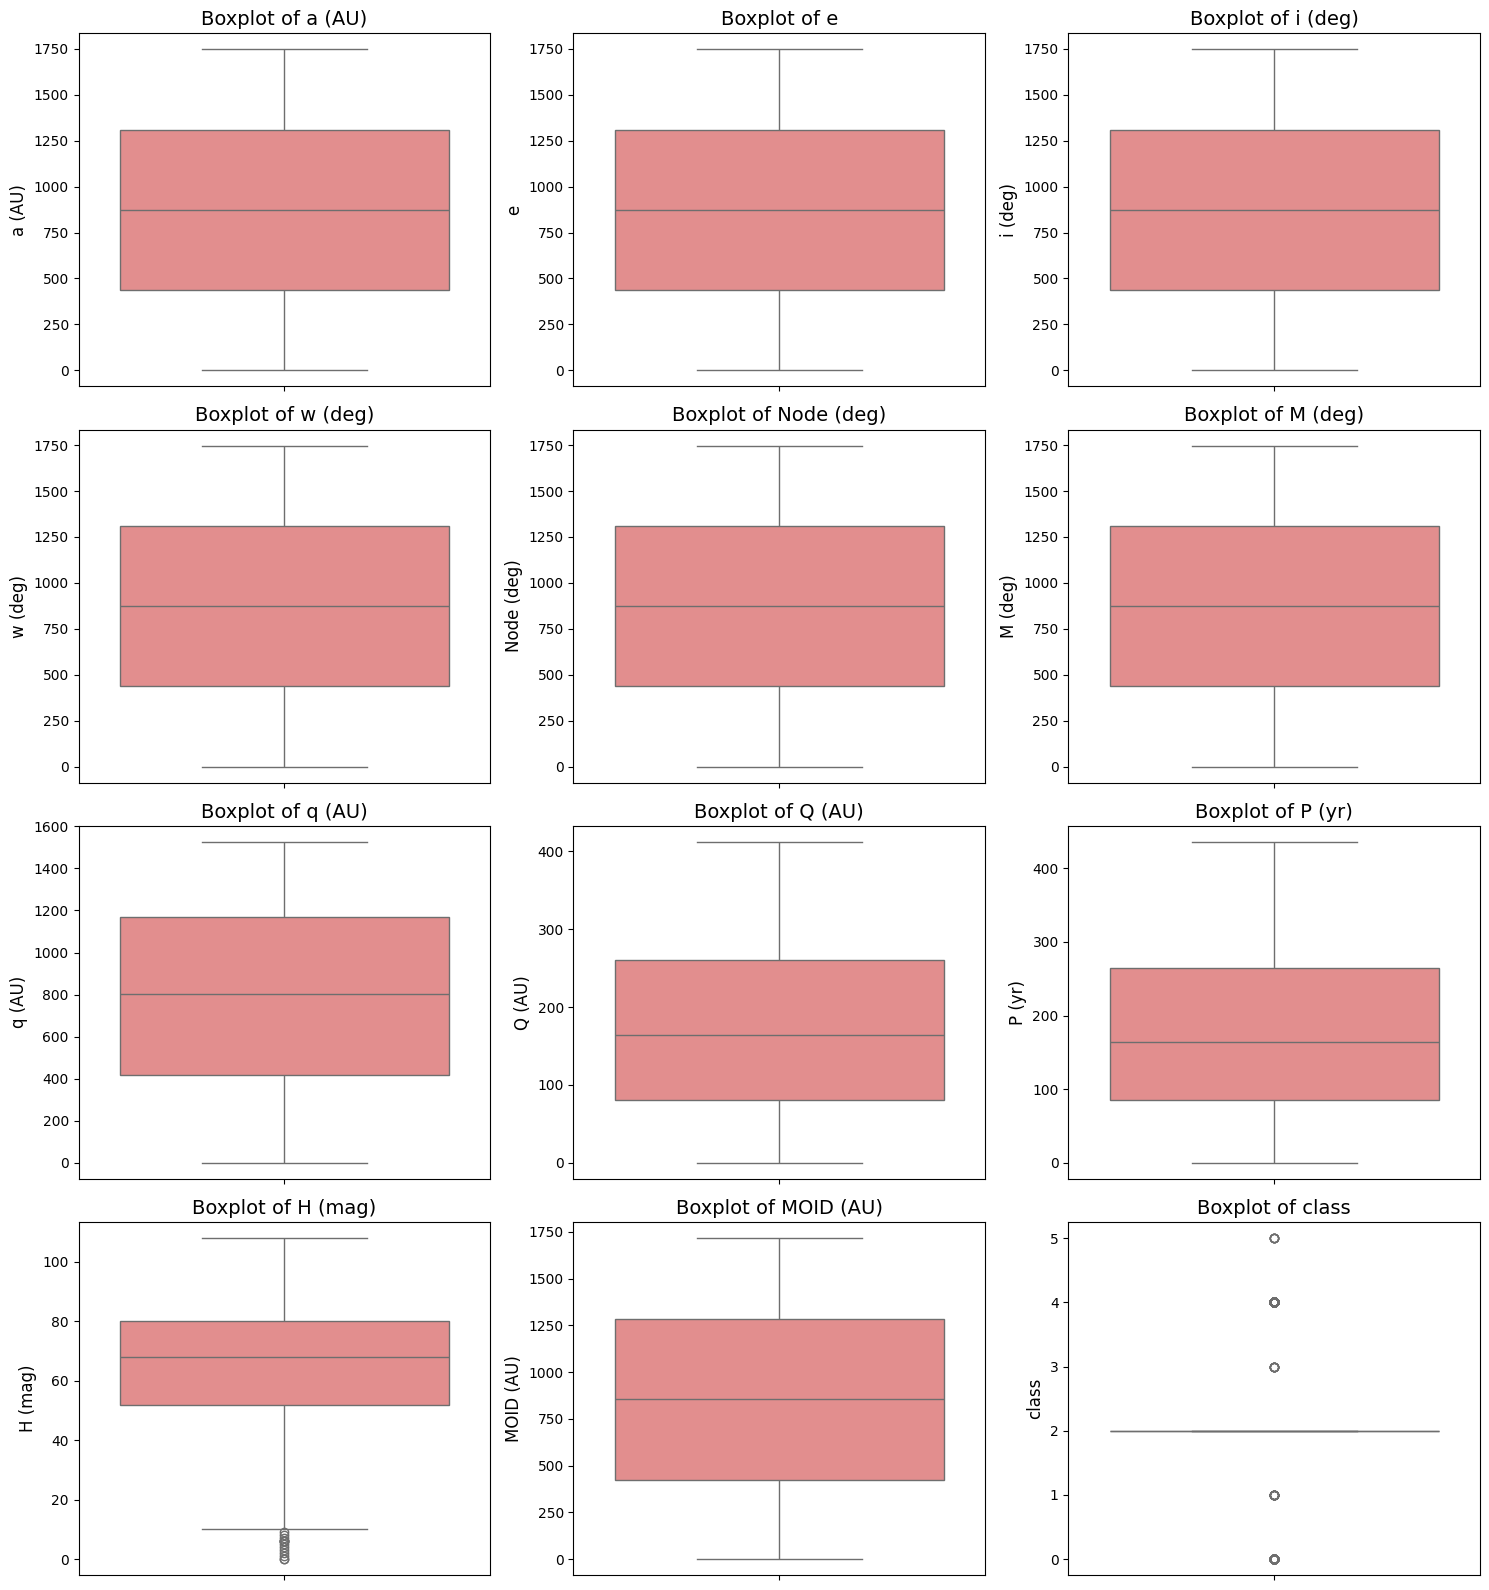

In [17]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

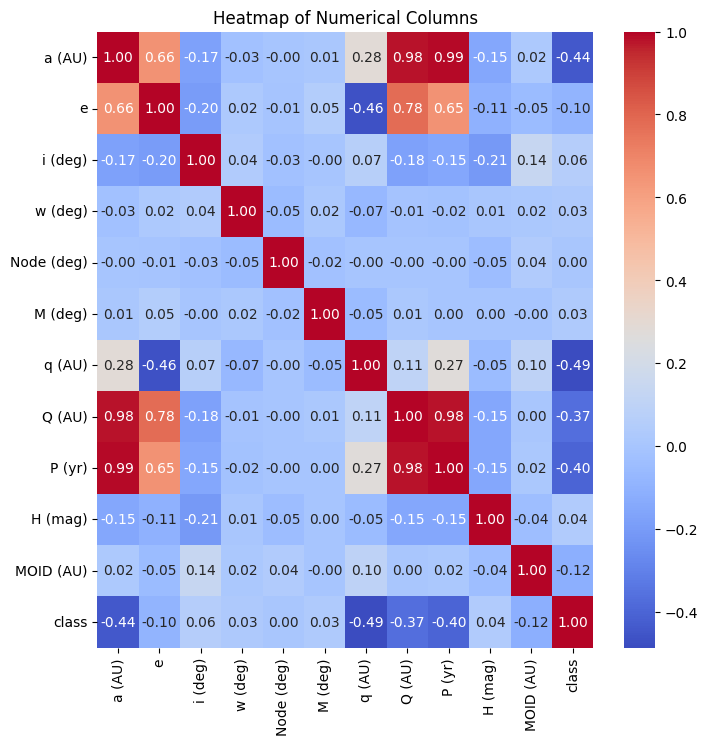

In [18]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 8))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [16]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [19]:
# Dropping highly correlated features

def remove_highly_correlated_features(df, threshold=0.9):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    df_reduced = df.drop(columns=to_drop)
    return df_reduced, to_drop

df, dropped_columns = remove_highly_correlated_features(df, threshold=0.85)
print("Dropped Columns:", dropped_columns)


Dropped Columns: ['Q (AU)', 'P (yr)']


In [20]:
X = df.drop('class', axis=1)
y = df['class']

In [21]:
# Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [22]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [24]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.9142857142857143, 0.8171428571428572, 0.9942857142857143, 0.9942857142857143, 0.9857142857142858, 0.9942857142857143, 0.9942857142857143, 0.9914285714285714, 0.9057142857142857]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.42      0.52        26
           1       0.00      0.00      0.00         2
           2       0.93      0.98      0.96       286
           3       0.00      0.00      0.00         2
           4       0.91      0.88      0.89        33
           5       0.00      0.00      0.00         1

    accuracy                           0.91       350
   macro avg       0.42      0.38      0.40       350
weighted avg       0.90      0.91      0.90       350

Confusion Matrix:
 [[ 11   0  15   0   0   0]
 [  0   0   2   0   0   0]
 [  5   0 280   0   1   0]
 [  0   0   0   0   1   1]
 [  0   0   3   0  29   1]
 [  0   0   0   0   1   0]]


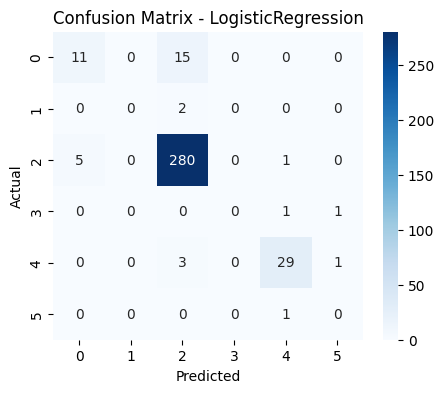

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00         2
           2       0.82      1.00      0.90       286
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        33
           5       0.00      0.00      0.00         1

    accuracy                           0.82       350
   macro avg       0.14      0.17      0.15       350
weighted avg       0.67      0.82      0.73       350

Confusion Matrix:
 [[  0   0  26   0   0   0]
 [  0   0   2   0   0   0]
 [  0   0 286   0   0   0]
 [  0   0   2   0   0   0]
 [  0   0  33   0   0   0]
 [  0   0   1   0   0   0]]


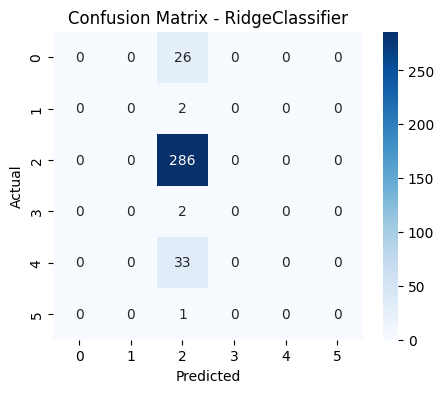

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00       286
           3       1.00      1.00      1.00         2
           4       0.97      1.00      0.99        33
           5       0.00      0.00      0.00         1

    accuracy                           0.99       350
   macro avg       0.82      0.83      0.83       350
weighted avg       0.99      0.99      0.99       350

Confusion Matrix:
 [[ 26   0   0   0   0   0]
 [  0   2   0   0   0   0]
 [  1   0 285   0   0   0]
 [  0   0   0   2   0   0]
 [  0   0   0   0  33   0]
 [  0   0   0   0   1   0]]


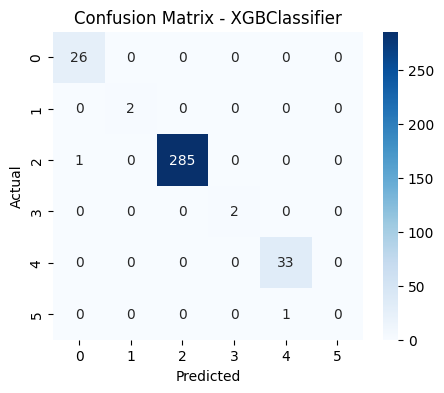

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00       286
           3       1.00      1.00      1.00         2
           4       0.97      1.00      0.99        33
           5       0.00      0.00      0.00         1

    accuracy                           0.99       350
   macro avg       0.82      0.83      0.83       350
weighted avg       0.99      0.99      0.99       350

Confusion Matrix:
 [[ 26   0   0   0   0   0]
 [  0   2   0   0   0   0]
 [  1   0 285   0   0   0]
 [  0   0   0   2   0   0]
 [  0   0   0   0  33   0]
 [  0   0   0   0   1   0]]


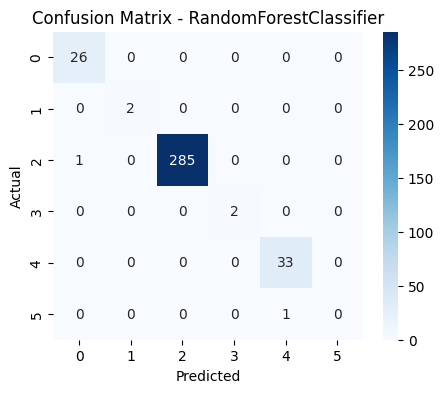

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.00      0.00      0.00         2
           2       0.99      1.00      1.00       286
           3       0.00      0.00      0.00         2
           4       0.97      1.00      0.99        33
           5       0.00      0.00      0.00         1

    accuracy                           0.99       350
   macro avg       0.49      0.50      0.50       350
weighted avg       0.98      0.99      0.98       350

Confusion Matrix:
 [[ 26   0   0   0   0   0]
 [  0   0   2   0   0   0]
 [  0   0 286   0   0   0]
 [  0   0   0   0   0   2]
 [  0   0   0   0  33   0]
 [  0   0   0   0   1   0]]


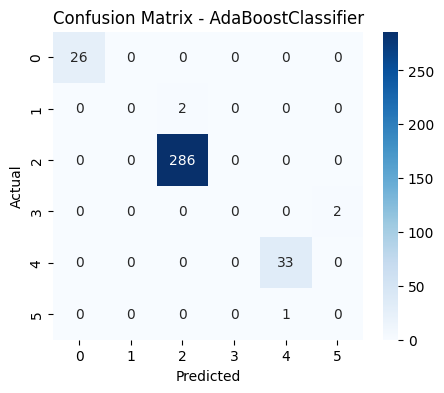

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00       286
           3       1.00      1.00      1.00         2
           4       0.97      0.97      0.97        33
           5       0.00      0.00      0.00         1

    accuracy                           0.99       350
   macro avg       0.83      0.83      0.83       350
weighted avg       0.99      0.99      0.99       350

Confusion Matrix:
 [[ 26   0   0   0   0   0]
 [  0   2   0   0   0   0]
 [  0   0 286   0   0   0]
 [  0   0   0   2   0   0]
 [  0   0   0   0  32   1]
 [  0   0   0   0   1   0]]


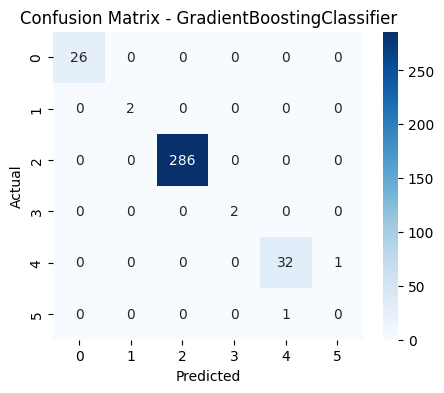

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00       286
           3       1.00      1.00      1.00         2
           4       0.97      0.94      0.95        33
           5       0.00      0.00      0.00         1

    accuracy                           0.99       350
   macro avg       0.82      0.82      0.82       350
weighted avg       0.99      0.99      0.99       350

Confusion Matrix:
 [[ 26   0   0   0   0   0]
 [  0   2   0   0   0   0]
 [  1   0 285   0   0   0]
 [  0   0   0   2   0   0]
 [  0   0   0   0  31   2]
 [  0   0   0   0   1   0]]


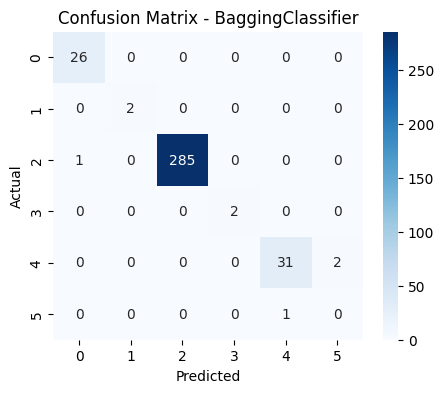

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00       286
           3       1.00      1.00      1.00         2
           4       1.00      0.91      0.95        33
           5       0.25      1.00      0.40         1

    accuracy                           0.99       350
   macro avg       0.88      0.98      0.89       350
weighted avg       1.00      0.99      0.99       350

Confusion Matrix:
 [[ 26   0   0   0   0   0]
 [  0   2   0   0   0   0]
 [  0   0 286   0   0   0]
 [  0   0   0   2   0   0]
 [  0   0   0   0  30   3]
 [  0   0   0   0   0   1]]


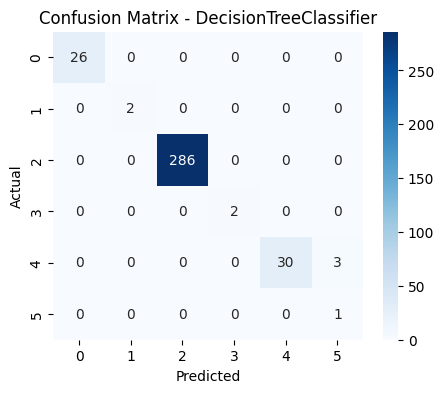

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.23      0.38        26
           1       0.00      0.00      0.00         2
           2       0.92      0.99      0.95       286
           3       0.00      0.00      0.00         2
           4       0.81      0.88      0.84        33
           5       0.00      0.00      0.00         1

    accuracy                           0.91       350
   macro avg       0.45      0.35      0.36       350
weighted avg       0.90      0.91      0.88       350

Confusion Matrix:
 [[  6   0  20   0   0   0]
 [  0   0   2   0   0   0]
 [  0   0 282   0   4   0]
 [  0   0   0   0   2   0]
 [  0   0   4   0  29   0]
 [  0   0   0   0   1   0]]


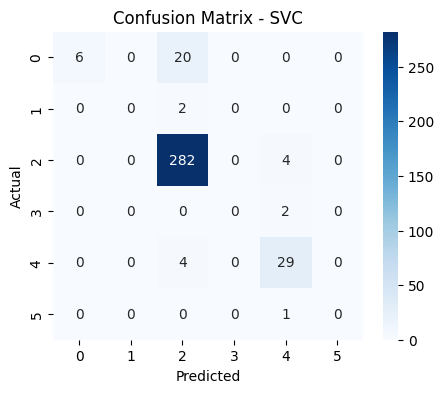

In [25]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()